# Genrify Project
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API.

# Data Loading Using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 2000
Number of attributes: 12
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	speechiness
	tempo
	time_signature
	valence


In [2]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Coldplay,Viva La Vida,0.09410,0.485,242373,0.619,0.000003,5,0.1090,-7.115,0.0289,138.017,4.0,0.424,alternative
1,Trails and Ways,Animal (Miike Snow Cover),0.25300,0.686,197624,0.606,0.000000,11,0.1590,-7.897,0.0539,112.107,4.0,0.418,alternative
2,Mumford & Sons,Little Lion Man,0.02750,0.517,245173,0.492,0.000032,5,0.0873,-8.051,0.0272,138.579,4.0,0.446,alternative
3,Linkin Park,Numb,0.00366,0.493,186240,0.856,0.000000,6,0.6280,-4.134,0.0384,110.097,4.0,0.218,alternative
4,The Naked And Famous,Punching In A Dream,0.00276,0.476,238133,0.894,0.000847,6,0.1580,-3.636,0.0469,115.053,4.0,0.164,alternative


# Target variable

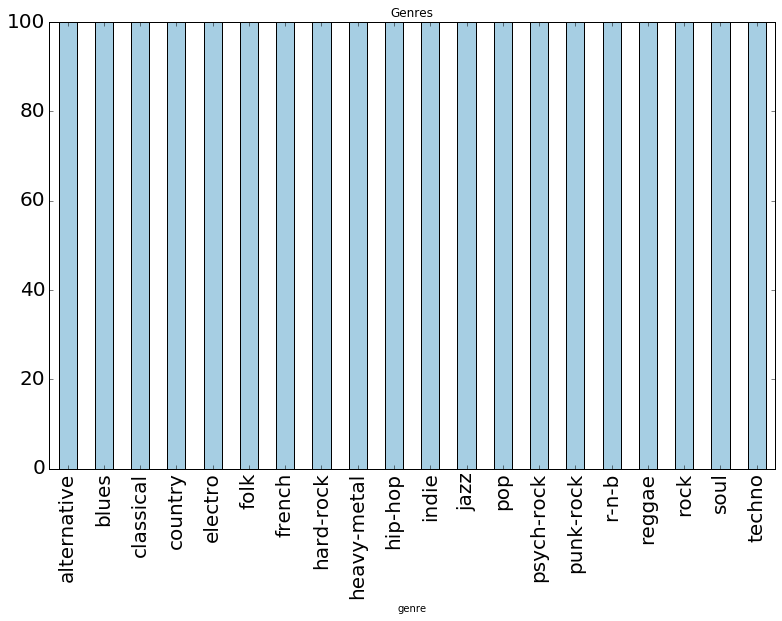

In [3]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [4]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))

Dimension: (2000, 20)
array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])


# Acousticness attribute

<IPython.core.display.Javascript object>


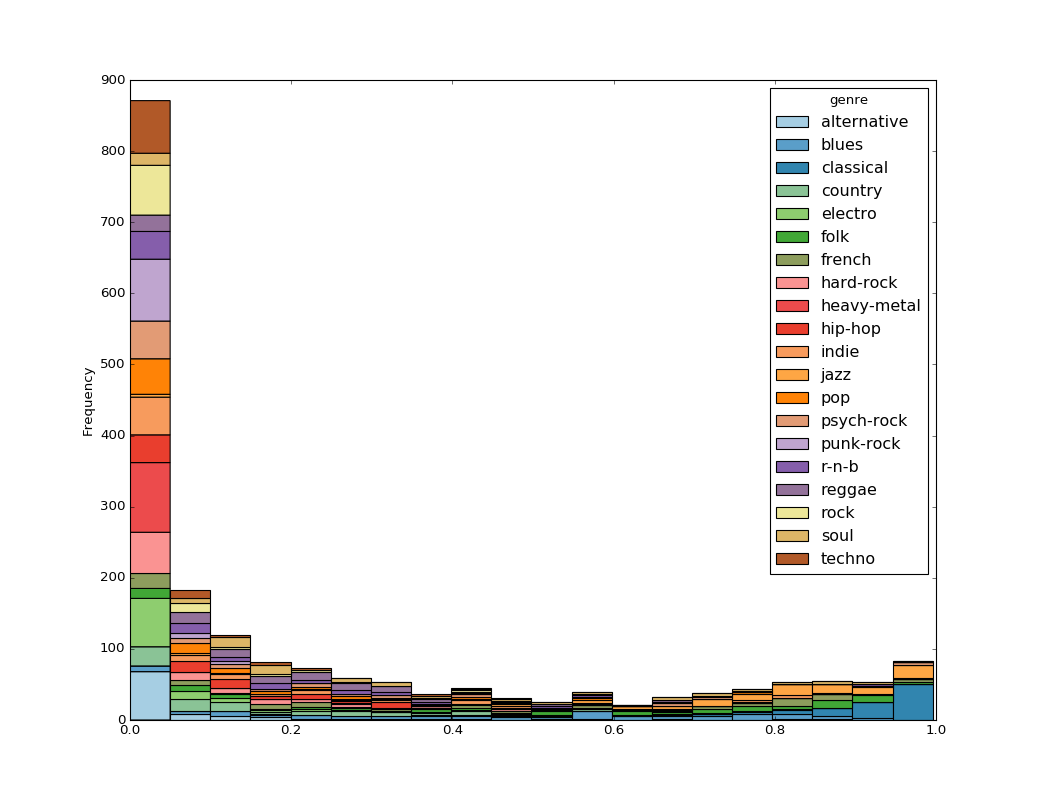

In [6]:
%matplotlib notebook
acousticness = data[['acousticness']]
acousticness_genre = data.loc[:,['acousticness','genre']]

acousticness_by_genre = acousticness_genre.pivot(columns='genre', values='acousticness')
acousticness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [7]:
acousticness.describe()

,acousticness
count,2000.000000
mean,0.252320
std,0.319621
min,0.000001
25%,0.007850
50%,0.082300
75%,0.419500
max,0.996000


# Danceability attribute

<IPython.core.display.Javascript object>


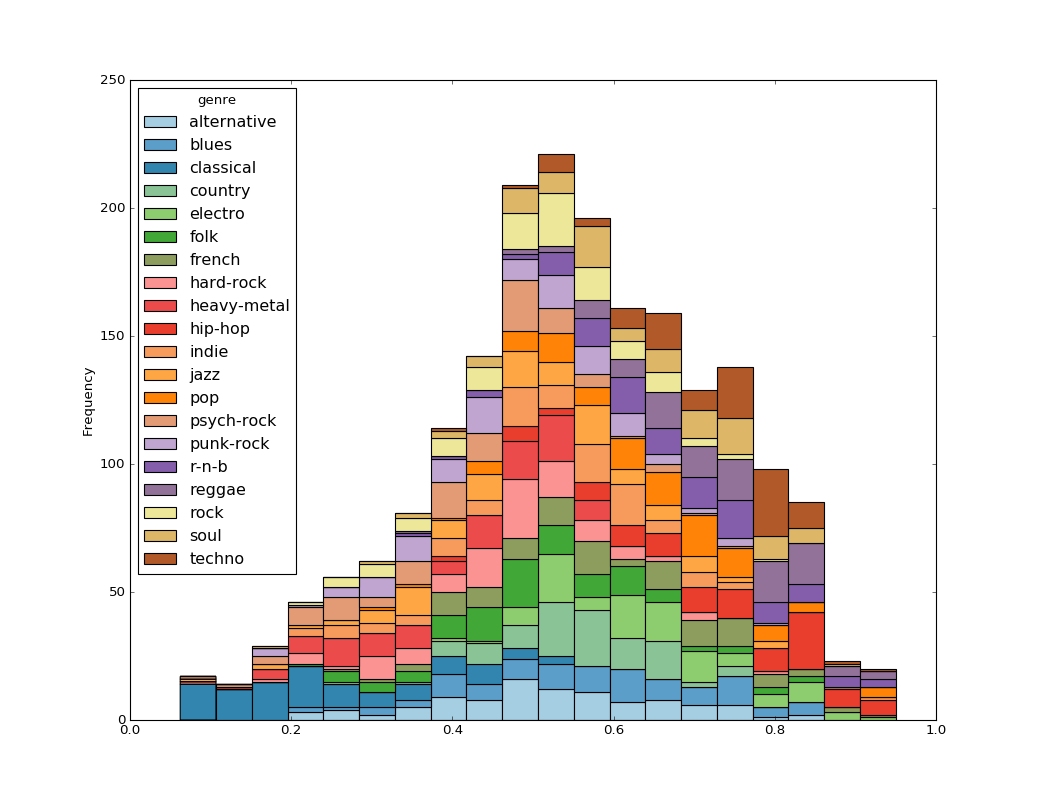

In [8]:
danceability = data[['danceability']]
danceability_genre = data.loc[:,['danceability','genre']]

danceability_by_genre = danceability_genre.pivot(columns='genre', values='danceability')
danceability_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [9]:
danceability.describe()

,danceability
count,2000.000000
mean,0.552618
std,0.176299
min,0.062300
25%,0.443000
50%,0.553000
75%,0.682000
max,0.950000


# Duration attribute

<IPython.core.display.Javascript object>


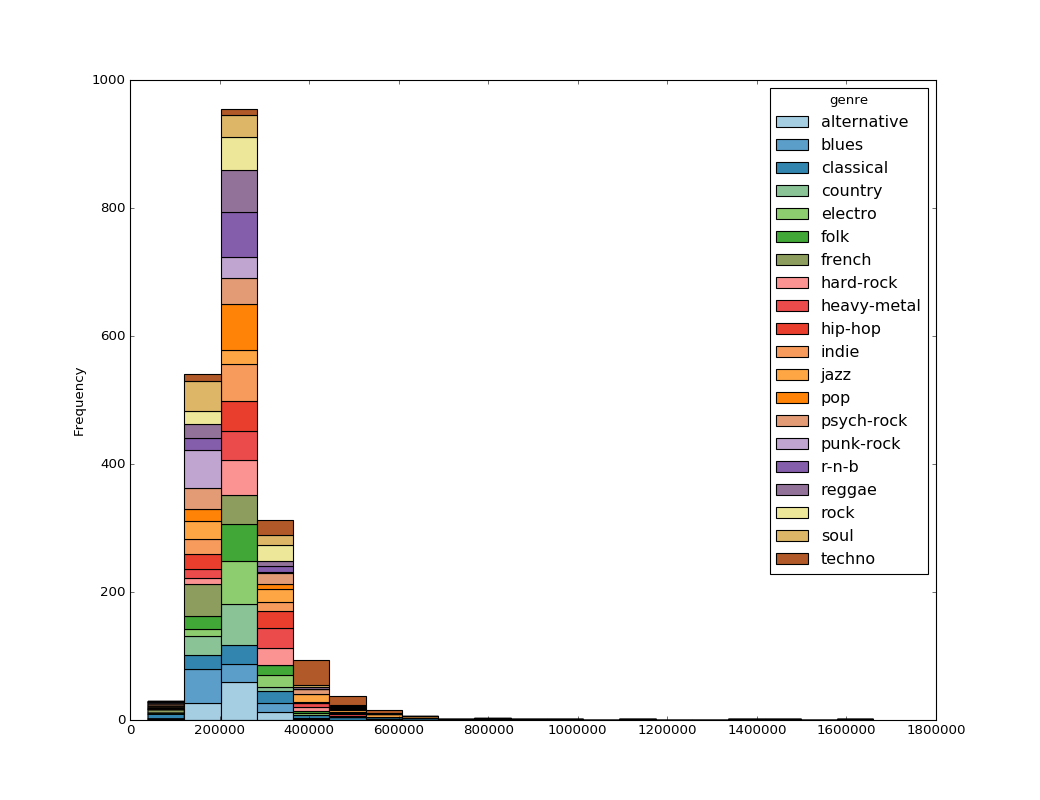

In [10]:
duration_ms = data[['duration_ms']]
duration_ms_genre = data.loc[:,['duration_ms','genre']]

duration_ms_by_genre = duration_ms_genre.pivot(columns='genre', values='duration_ms')
duration_ms_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [11]:
duration_ms.describe()

,duration_ms
count,2.000000e+03
mean,2.510632e+05
std,1.015924e+05
min,4.013300e+04
25%,1.973102e+05
50%,2.321790e+05
75%,2.787202e+05
max,1.660000e+06


# Energy attribute

<IPython.core.display.Javascript object>


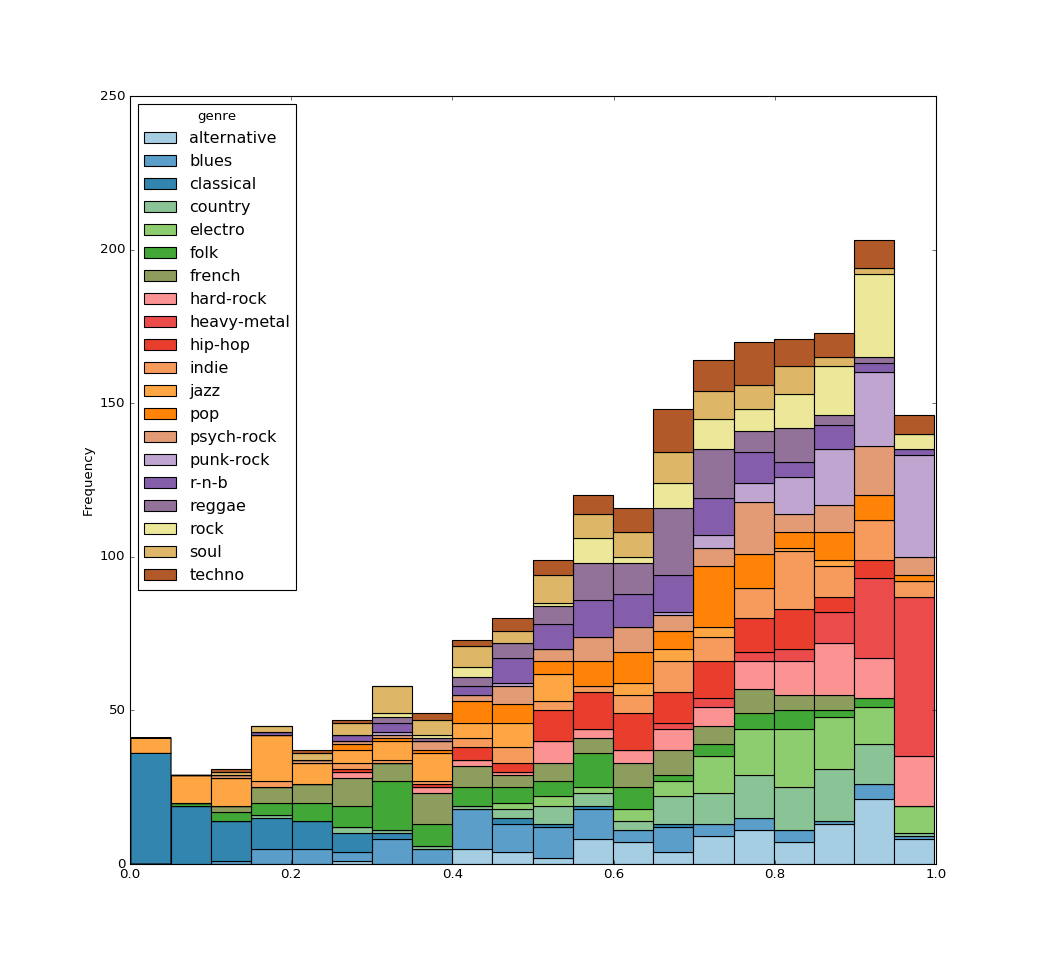

In [12]:
energy = data[['energy']]
energy_genre = data.loc[:,['energy','genre']]

energy_by_genre = energy_genre.pivot(columns='genre', values='energy')
energy_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,12],bins=20)

In [13]:
energy.describe()

,energy
count,2000.000000
mean,0.653649
std,0.249312
min,0.001060
25%,0.505000
50%,0.707500
75%,0.856250
max,0.998000


# Instrumentalness attribute

<IPython.core.display.Javascript object>


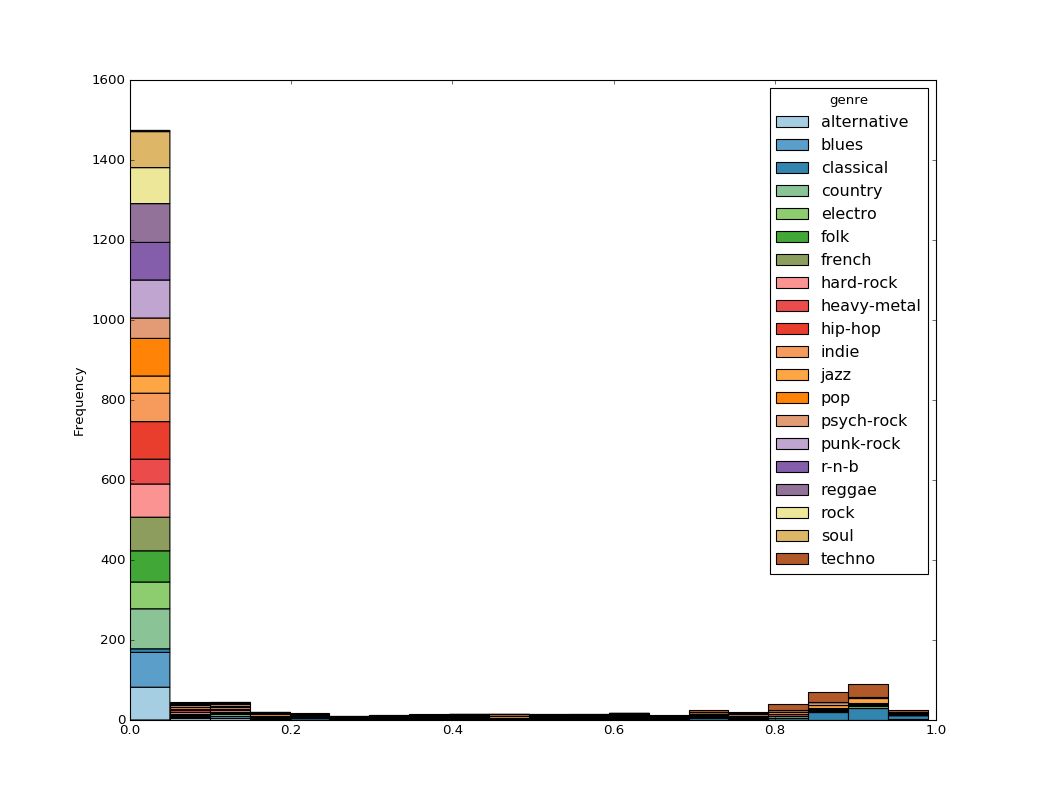

In [14]:
instrumentalness = data[['instrumentalness']]
instrumentalness_genre = data.loc[:,['instrumentalness','genre']]

instrumentalness_by_genre = instrumentalness_genre.pivot(columns='genre', values='instrumentalness')
instrumentalness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [15]:
instrumentalness.describe()

,instrumentalness
count,2000.000000
mean,0.157688
std,0.306545
min,0.000000
25%,0.000000
50%,0.000174
75%,0.077700
max,0.990000


# Key attribute

<IPython.core.display.Javascript object>


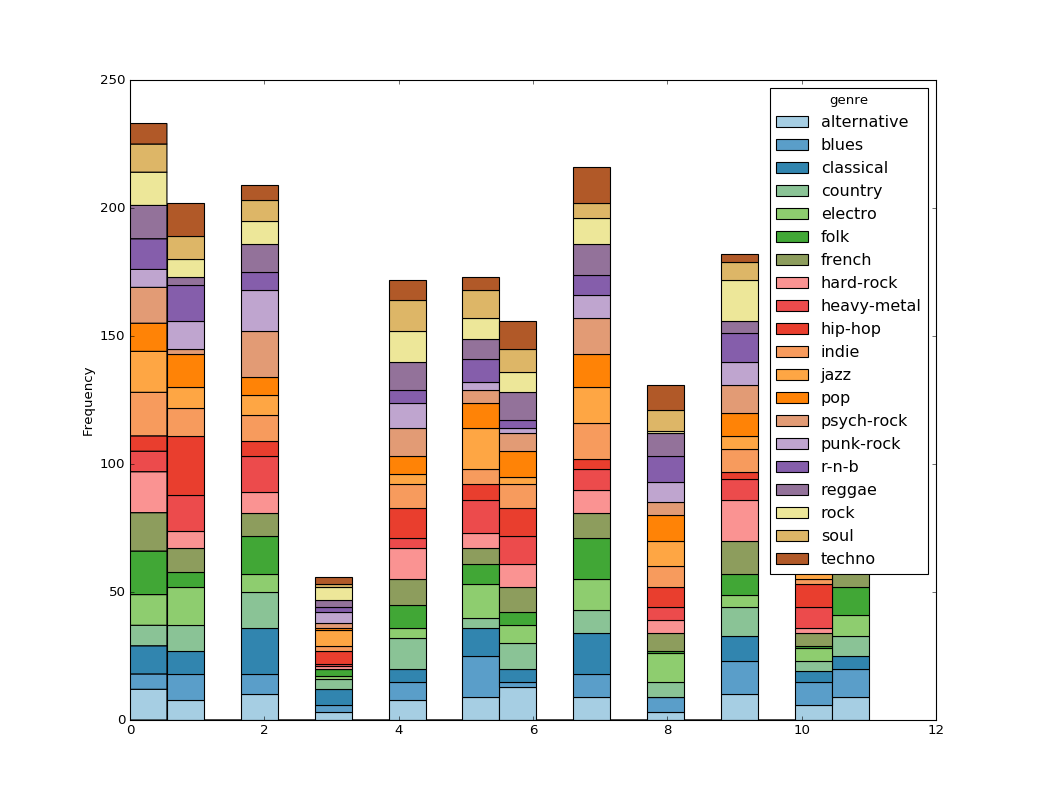

In [16]:
key = data[['key']]
key_genre = data.loc[:,['key','genre']]

key_by_genre = key_genre.pivot(columns='genre', values='key')
key_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [17]:
key.describe()

,key
count,2000.000000
mean,5.165500
std,3.526234
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,11.000000


# Liveness attribute

<IPython.core.display.Javascript object>


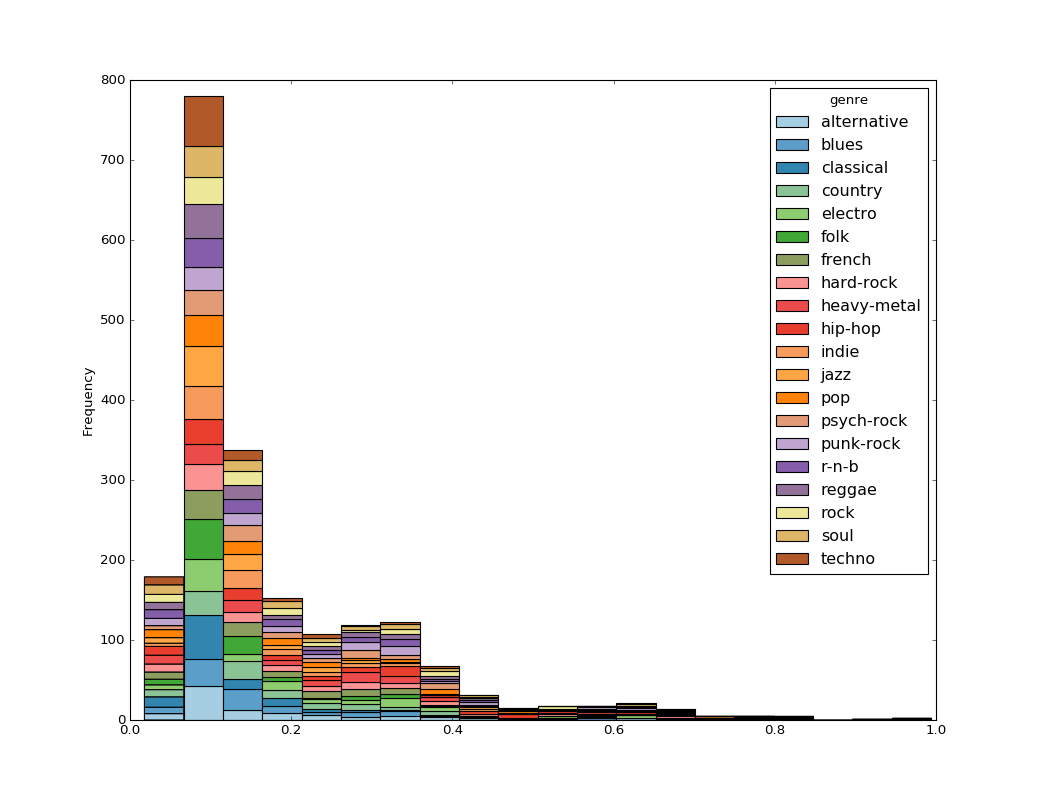

In [18]:
liveness = data[['liveness']]
liveness_genre = data.loc[:,['liveness','genre']]

liveness_by_genre = liveness_genre.pivot(columns='genre', values='liveness')
liveness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [19]:
liveness.describe()

,liveness
count,2000.000000
mean,0.180580
std,0.142925
min,0.017900
25%,0.090975
50%,0.119000
75%,0.234000
max,0.994000


# Loudness attribute

<IPython.core.display.Javascript object>


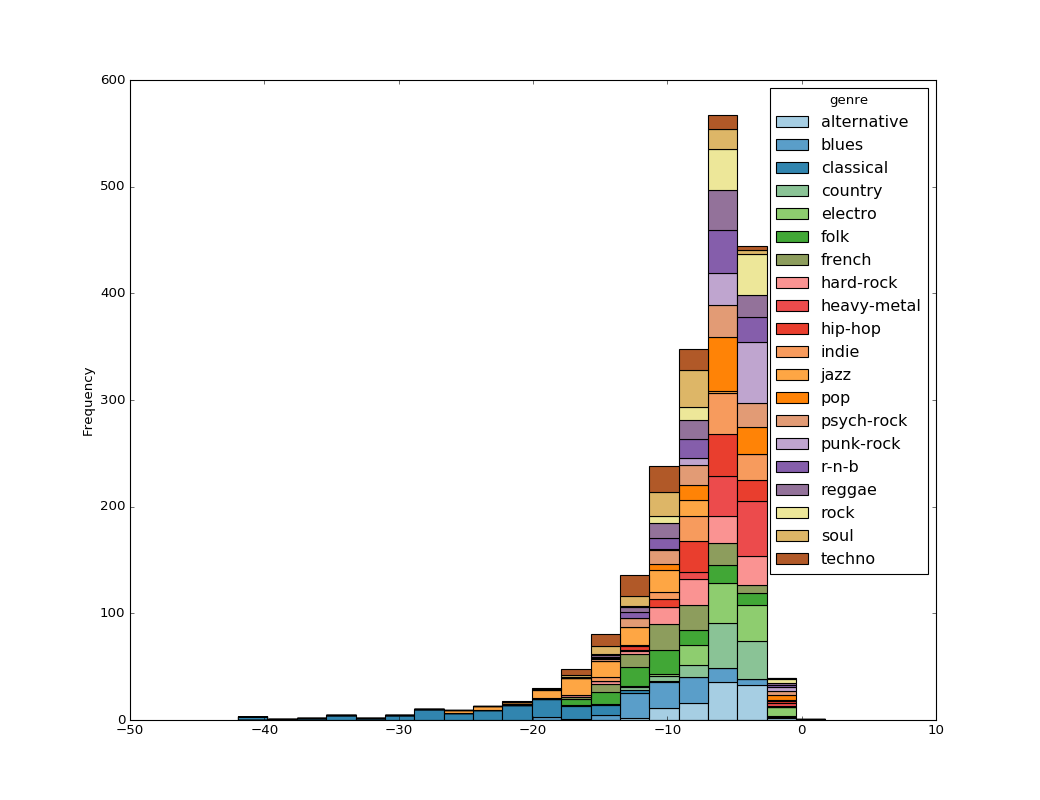

In [20]:
loudness = data[['loudness']]
loudness_genre = data.loc[:,['loudness','genre']]

loudness_by_genre = loudness_genre.pivot(columns='genre', values='loudness')
loudness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [21]:
loudness.describe()

,loudness
count,2000.000000
mean,-8.209970
std,5.125075
min,-41.935000
25%,-10.084250
50%,-6.773000
75%,-4.836000
max,1.759000


# Speechiness attribute

<IPython.core.display.Javascript object>


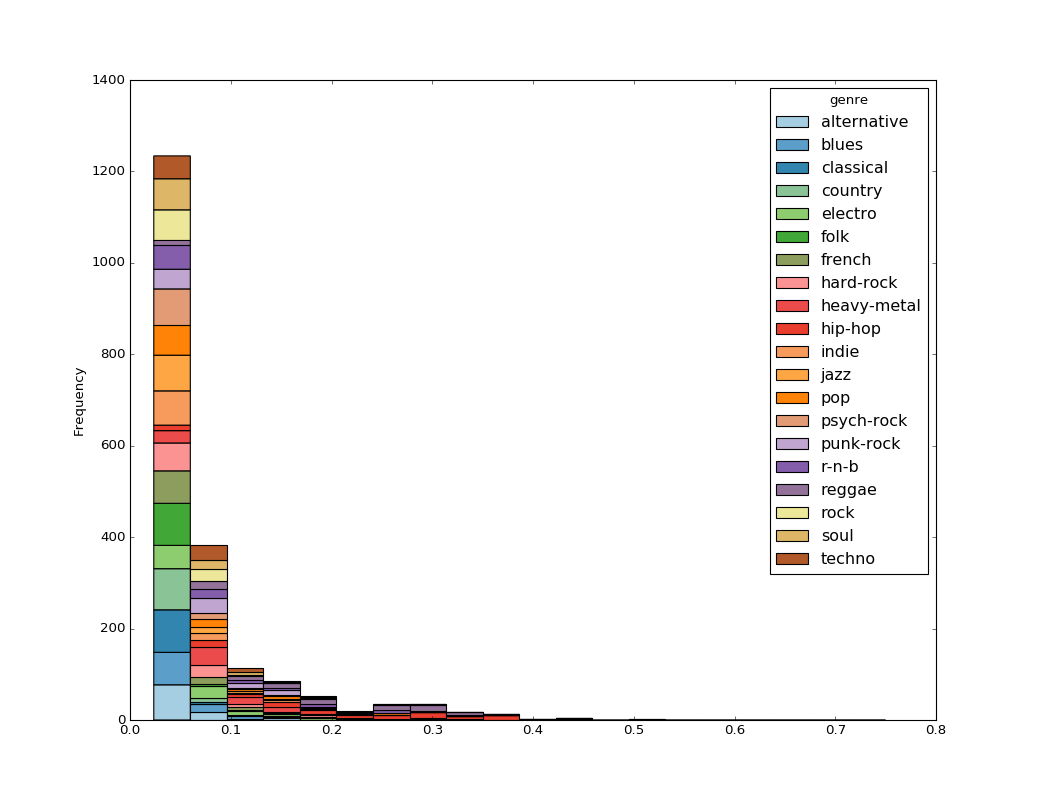

In [22]:
speechiness = data[['speechiness']]
speechiness_genre = data.loc[:,['speechiness','genre']]

speechiness_by_genre = speechiness_genre.pivot(columns='genre', values='speechiness')
speechiness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [23]:
speechiness.describe()

,speechiness
count,2000.000000
mean,0.076345
std,0.072569
min,0.023600
25%,0.036300
50%,0.048150
75%,0.081025
max,0.749000


# Tempo attribute

<IPython.core.display.Javascript object>


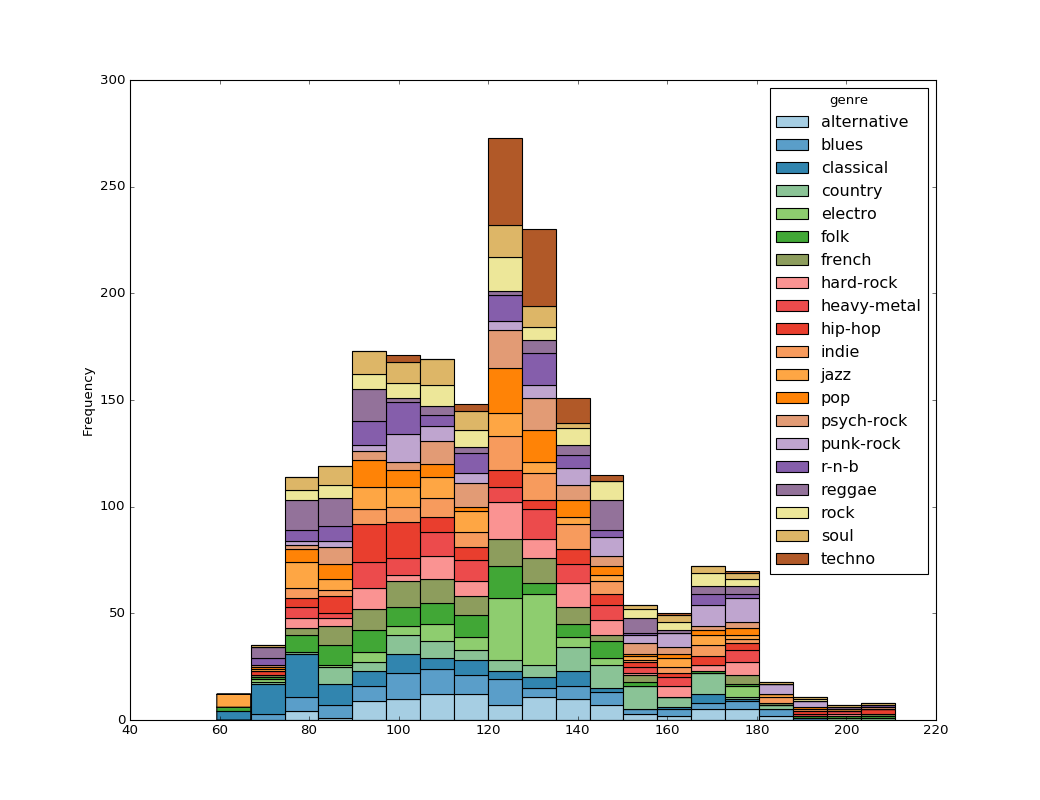

In [24]:
tempo = data[['tempo']]
tempo_genre = data.loc[:,['tempo','genre']]

tempo_by_genre = tempo_genre.pivot(columns='genre', values='tempo')
tempo_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [25]:
tempo.describe()

,tempo
count,2000.000000
mean,121.259742
std,28.371341
min,59.385000
25%,99.640500
50%,121.001500
75%,138.047750
max,210.750000


# Time Signature attribute

<IPython.core.display.Javascript object>


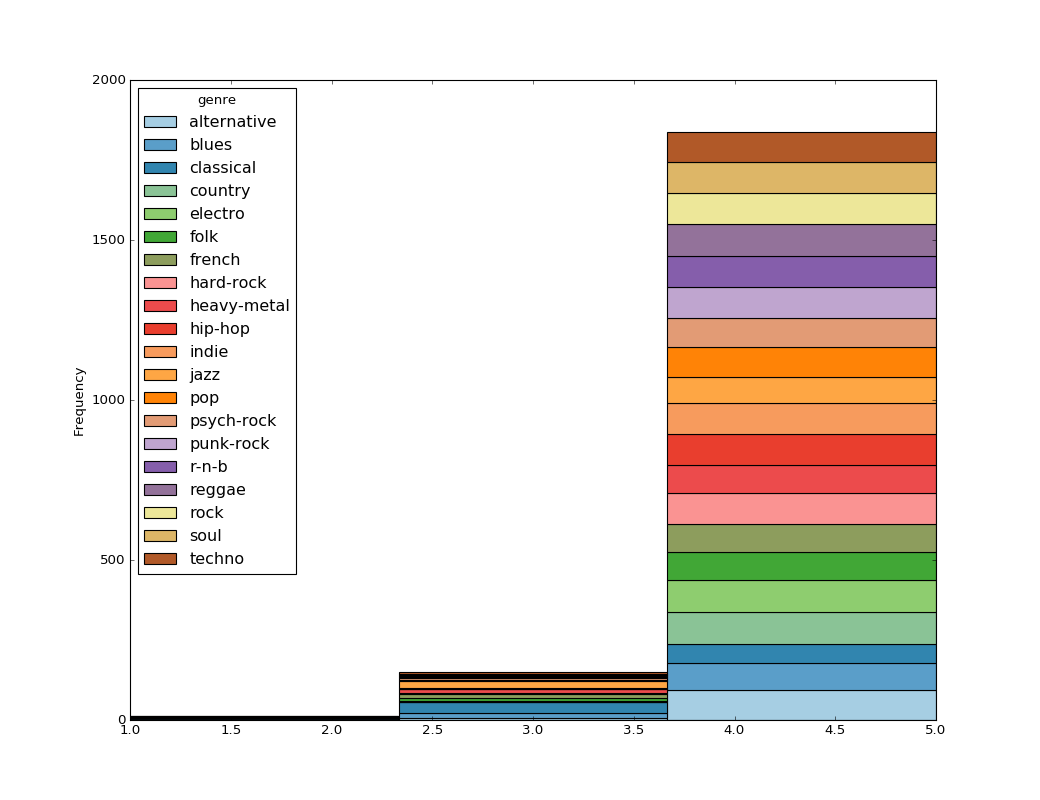

In [26]:
time_signature = data[['time_signature']]
#time_signature.plot(kind='bar',figsize=[13,8])
time_signature_genre = data.loc[:,['time_signature','genre']]

time_signature_by_genre = time_signature_genre.pivot(columns='genre', values='time_signature')
time_signature_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=3)


In [27]:
time_signature.describe()

/home/benoit/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,time_signature
count,1999.000000
mean,3.923962
std,0.365177
min,1.000000
25%,NaN
50%,NaN
75%,NaN
max,5.000000


# Valence attribute

<IPython.core.display.Javascript object>


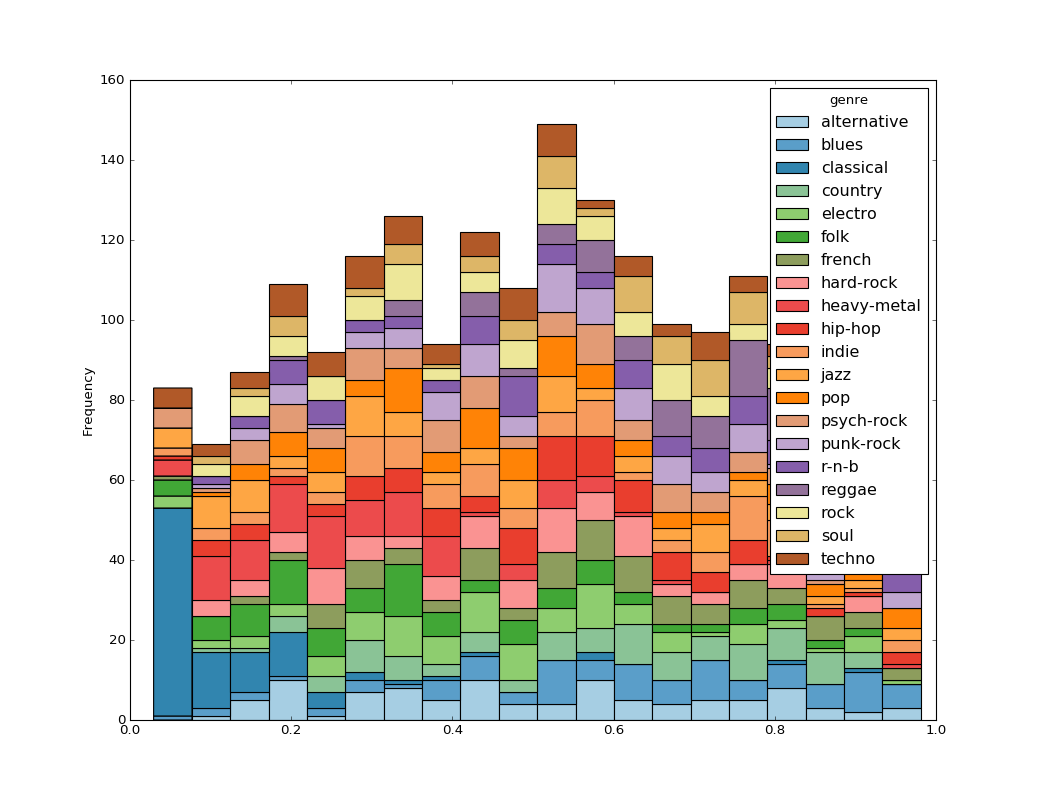

In [28]:
valence = data[['valence']]
valence_genre = data.loc[:,['valence','genre']]

valence_by_genre = valence_genre.pivot(columns='genre', values='valence')
valence_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [29]:
valence.describe()

,valence
count,2000.000000
mean,0.495031
std,0.251456
min,0.029300
25%,0.292750
50%,0.501500
75%,0.695250
max,0.981000
